# MURCHIE85 TWITTER PROCESSING 

&#x1F34E; **TOPIC = "Theresa May"**


## AUTOMATED RESEARCH SUMMARY
    

![image](https://timedotcom.files.wordpress.com/2019/03/theresa-may-brexit-politics.jpg)

<br>


<div class="alert alert-block alert-info">
<b> This repo is for pulling metrics on a given keyword or hashtag and performs a series of reporting and analysis.</b>
</div>


<br>


   
![image](TWEETSs.png)
    



## GOOGLE SEARCH DEMOGRAPHICS 

Tweeting demographic           | Countries
:-------------------------:|:-------------------------:
![](map.png)  |  ![](countries.png)
<br>
## RELATED TOPICS  & QUERIES 

topics          | searches
:-------------------------:|:-------------------------:
![](relatedtopics.png)  |  ![](relatedqueries.png)


<br>
<br>

The top most popular words tweeted are :


- **May**
- **Grenfell**
- **Tears**
- **Statement**
- **Windrush**

![image](compare.png)


## Twitter Bio Analysis

![image](BIO.png)










    
### SENTIMENT ANALYSIS
VIEWS WERE : **SUBJECTIVE**  (30%) & **NEGATIVELY-SUBJECTIVE** (30%) **OBJECTIVE** (40%)



### TWEET SAMPLE 

Random value picked from array: 


<div class="alert alert-block alert-info">
'U.K. Prime Minister Theresa May announced her resignation earlier today. \n\n@swajcmanearle wrote about how Boris Joh… https://t.co/j8PXKFeIbO'

</div>

### MOST RETWEETED

Technically the most popular tweet (note, this is not always the source of the hashtag)

<div class="alert alert-block alert-danger">
<b>@davidschneider (past 24 hours)</b>  Theresa May guide to crying

NO TEARS for<br>
Grenfell<br>
The Windrush generation<br>
Deaths and misery caused by the hostile environment, by austerity, by welfare cuts, NHS cuts<br>
598 rough sleepers dying on our streets last year<br>
4m children in poverty<br>
Record food bank use<br>

TEARS for<br>
Herself
</div>



### ANALYSIS CRITIQUE

<br>

WILL BE UPDATED IN NEXT  24 HOURS 

<br>



### CONCLUSION & EXTERNAL ANALYSIS

*This is my (Adam McMurchie's) opinion on the data from the tweets, it serves as no objective truth.Since the tweets themselves are a mixture of fact & opinion. 

<br>

WILL BE UPDATED IN NEXT  24 HOURS 


<br><br>

**RECOMMENDATIONS** WILL BE UPDATED IN NEXT  24 HOURS 


<br>

# TECHNICAL WALKTHROUGH 


## OVERVIEW

**SKIP TO BOTTOM FOR FULL RESULTS & GRAPH BREAKDOWN **

- Pulls live tweets from all over twitter 
- Imports Tweepy Library 
- Consumes Twitter API 
- Desgined to be keyword driven
- All metrics can be captured
- No limit on Runtime (best to terminate when you want)

## Limitations & info
1. LOCATION filter is tricky
2. Streaming connects to the “public streams” (all public data) 
3. This is data provided by the Twitter API which accesses their database, the maintenence of DB and thus data quality is managed by Twitter

Example of parameter setting done in stream filter 

```
stream.filter(follow=["2211149702"])
```


### AUTHOR : ADAM MCMURCHIE 

![image](https://s3.amazonaws.com/re-work-production/avatars/1104/original.png?1485507466)

Github [here](https://github.com/murchie85)  

Mysite [here](https://murchie85.github.io/)

# AUTHENTICATION

You will need to change f variable to point to your credentials file, I save mines in a text file and split the comma. Not uploaded to this repo obviously.

In [3]:
import datetime


f = open("../donotgit/access.txt", "r")
keys = f.read()
f.close()
keys  = keys.split(',')
#print("Access Keys are : " + str(keys))
ACCESS_TOKEN = keys[0]
ACCESS_SECRET = keys[1]


f = open("../donotgit/consumer.txt", "r")
keys = f.read()
keys  = keys.split(',')
#print("Consumer Keys are : " + str(keys))
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]


# PULLING DOWN THE DATA 

This is where the magic happens, api authentication is set up, tweepy library is imported for the work and a class allow us to pull live data. This is appended to array for processing later. 

If you want to change the parameters, edit the following line:  

```
stream.filter(track=["SexStrike"],languages=["en"])
```

*NOTE* -   this will just keep running until you force terminate, i haven't added in a terminate loop yet.

In [4]:
from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import clear_output
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

status_array = []

progress = 0
max_count = 10000

f = IntProgress(description='Processing:',min=0, max=max_count,) # instantiate the bar
display(f) # display the bar



class StreamListener(tweepy.StreamListener):
    tweet_number=0   # class variable
    


    def on_status(self, status):
        self.max_tweets=max_count # max number of tweets
        self.tweet_number+=1   
        f.value += 1 # signal to increment the progress bar
        progress = (f.value/max_count) * 100
        progress = format(progress, '.2f')
        print('Progress: ' + str(progress) + " %")
        clear_output(wait=True)
        status_array.append(status._json)

        if self.tweet_number>=self.max_tweets:
            sys.exit('PROCESSING COMPLETE : '+str(self.max_tweets)+' tweets processed.')

        
    def on_error(self, status_code):
        if status_code == 420:
            return False

stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

#print('Pulling down data.....')
stream.filter(track=["Theresa May"],languages=["en"])


SystemExit: PROCESSING COMPLETE : 10000 tweets processed.

/Users/adammcmurchie/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# HISTORICAL DATA SWITCHED OFF (IF YOU SWITCH ON, THEN SWITCH STREAM OFF ABOVE)


""""

from ipywidgets import IntProgress
from IPython.display import display
import time

import sys
# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the tweepy library
import tweepy

# Variables that contains the user credentials to access Twitter API 
# Captured earlier 

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)









status_array = []
LOOP_COUNT = 0
max_count = 1000


# Search for 10 most recent tweets about "Brexit"
tweets = tweepy.Cursor(api.search, q='Huawei', count=int(max_count))

# TRACK PROGRESS
f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar


print('Pulling down data.....')                    
for tweet in tweets.items(int(max_count)):
    f.value+=1
    time.sleep(.1)
    status_array.append(tweet._json)



print('Processing complete')



Pulling down data.....


KeyboardInterrupt: 

# QUICK STREAM

In [5]:
print('Number of records')
print(len(status_array))
print('')
print('The data keys are : ')
print(status_array[0].keys())
print('')
#print('An example element looks like: ')
#print(status_array[0])

Number of records
10000

The data keys are : 
dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])



# PRINT AND SAVE DATA

This section allows me to pull the recently mined data into a file in raw format incase i need it later.

In [ ]:
currentDT = datetime.datetime.now()
filename = "data/streamout-" + str(currentDT) + ".txt"

print(filename)

with open(filename, 'w') as f:
    for item in status_array:
        f.write("%s\n" % item)
f.close()

# REPORT GENERATION

In [ ]:
# WRITE OUT FULL REPORT
reportfile = "reports/printout-"+ str(currentDT) + ".txt"
descriptionfile = "data/description/printout-"+ str(currentDT) + ".txt"
tweetfile = "data/tweet/printout-"+ str(currentDT) + ".txt"

REPORTCOUNT = 0
with open(reportfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('------------------------------\n')
        f.write(status_array[y]['created_at'])
        f.write('------------------------------\n')
        f.write(status_array[y]['user']['name'])
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['location']))
        f.write('------------------------------\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('--------------REPLY COUNT----------------\n|')
        f.write(str(status_array[y]['reply_count']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------RETWEETED?----------------\n')
        f.write(str(status_array[y]['retweeted']))
        f.write('--------------RETWEET COUNT----------------\n')
        f.write(str(status_array[y]['retweet_count']))
        f.write('--------------FAVOURITED----------------\n')
        f.write(str(status_array[y]['favorited']))
        f.write('--------------FAVOURITE COUNT----------------\n')
        f.write(str(status_array[y]['favorite_count']))
        f.write('\n')
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    
    
# WRITE OUT ONLY DESCRIPTION
    
REPORTCOUNT = 0
with open(descriptionfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(str(status_array[y]['user']['description']))
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()
    

# WRITE OUT ONLY TWEET
    
REPORTCOUNT = 0
with open(tweetfile, 'w') as f:
    for y in range(0, len(status_array)):
        REPORTCOUNT = REPORTCOUNT + 1
        f.write('************************************************************\n')
        f.write(status_array[y]['text'])
        f.write('\n')
    f.write('number of records are : ')
    f.write(str(REPORTCOUNT))
        
f.close()

    
    
    
    
    
print('=========================SAMPLE OUTPUT================================')
print('************************************************************')
print(status_array[0]['text'])
print('------------------------------')
print(status_array[0]['created_at'])
print('------------------------------')
print(status_array[0]['user']['name'])
print('------------------------------')
print(status_array[0]['user']['location'])
print('------------------------------')
print(status_array[0]['user']['description'])
print('--------------REPLY COUNT----------------')
print(status_array[0]['reply_count'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------RETWEETED?----------------') 
print(status_array[0]['retweeted'])
print('--------------RETWEET COUNT----------------')
print(status_array[0]['retweet_count'])
print('--------------FAVOURITED----------------')
print(status_array[0]['favorited'])
print('--------------FAVOURITE COUNT----------------')
print(status_array[0]['favorite_count'])



## TWEET NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency,  **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [24]:
WORDONE='grenfell'
WORDTWO='windrush'
WORDTHREE='boris'
WORDFOUR = 'gove'
WORDFIVE = 'referendum'
WORDSIX = 'greens'
WORDSEVEN = 'referendum'
WORDEIGHT = 'leave'
WORDNINE = 'Andrea'
WORDTEN = 'leadsom'




WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()
WORDFOUR = WORDFOUR.upper()
WORDFIVE = WORDFIVE.upper()
WORDSIX = WORDSIX.upper()
WORDSEVEN = WORDSEVEN.upper()
WORDEIGHT = WORDEIGHT.upper()
WORDNINE = WORDNINE.upper()
WORDTEN = WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0


linecount = 0
APPENDED_TEXT = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    text = str(status_array[x]['text']).upper()
    APPENDED_TEXT = APPENDED_TEXT + str(text)
    
    
    if str(text).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(text).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(text).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(text).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(text).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(text).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(text).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(text).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(text).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(text).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
      
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT))
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT))
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT))
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT))
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT))
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT))
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT))
print('Total Number of Records: ' + str(linecount)) 


APPENDED_TEXT = APPENDED_TEXT.replace('#', '')
APPENDED_TEXT = APPENDED_TEXT.replace('.', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')
APPENDED_TEXT = APPENDED_TEXT.replace(',', '')

Total count of words - GRENFELL :1805
Total count of words - WINDRUSH :653
Total count of words - BORIS :488
Total count of words - GOVE :341
Total count of words - REFERENDUM :23
Total count of words - GREENS :0
Total count of words - REFERENDUM :23
Total count of words - LEAVE :260
Total count of words - ANDREA :3
Total count of words - LEADSOM :3
Total Number of Records: 10000


In [25]:
len(APPENDED_TEXT)

1191699

In [26]:
from collections import Counter, OrderedDict
DISC = APPENDED_TEXT.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['TODAY'],x['GET'],x['WHEN'],x['COMMENT'],x['HER'],x['SHE'],x['FURTHER']


top_tweets = OrderedDict(x.most_common(20))
print(top_tweets)


OrderedDict([('THERESA', 7644), ('MAY', 6454), ('GRENFELL', 1790), ('PRIME', 1187), ('MINISTER', 1017), ("MAY'S", 890), ('TEARS', 860), ('RESIGNATION', 791), ('PEOPLE', 761), ('STATEMENT', 722), ('NECESSARY', 701), ('UNION', 696), ('FIRE', 682), ('@LADYHAJA:', 677), ('BRIGADES', 675), ('LEGACY', 648), ('WINDRUSH', 643), ('JOB', 640), ('UK', 621), ('CRYING', 604)])


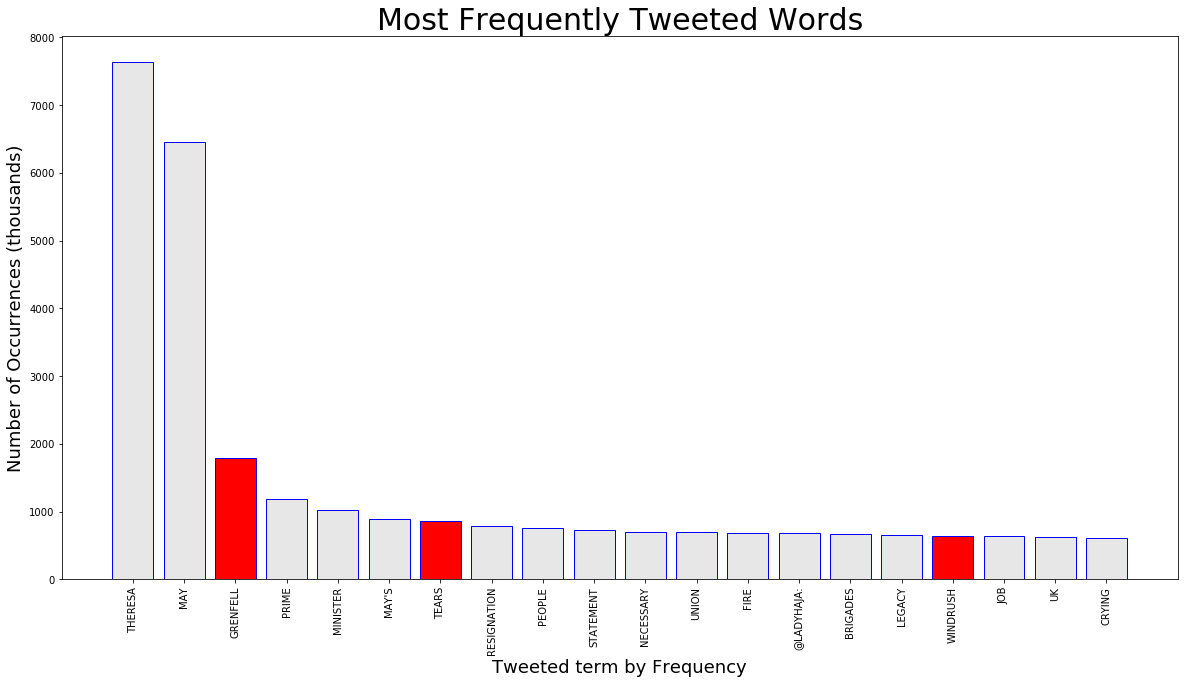

In [29]:
import matplotlib.pyplot as plt

E = top_tweets
one = (0.1, 0.1, 0.1, 0.1)
two = (0.1, 0.1, 0.1, 0.1)
three = 'red'
four= (0.1, 0.1, 0.1, 0.1)
five= (0.1, 0.1, 0.1, 0.1)
six= (0.1, 0.1, 0.1, 0.1)
seven= 'red'
eight= (0.1, 0.1, 0.1, 0.1)
nine= (0.1, 0.1, 0.1, 0.1)
ten= (0.1, 0.1, 0.1, 0.1)
eleven= (0.1, 0.1, 0.1, 0.1)
twelve= (0.1, 0.1, 0.1, 0.1)
thirteen= (0.1, 0.1, 0.1, 0.1)
fourteen= (0.1, 0.1, 0.1, 0.1)
fithteen= (0.1, 0.1, 0.1, 0.1)
sixteen= (0.1, 0.1, 0.1, 0.1)
seventeen= 'red'
eighteen= (0.1, 0.1, 0.1, 0.1)
nineteen= (0.1, 0.1, 0.1, 0.1)
twenty= (0.1, 0.1, 0.1, 0.1)



color_last = [one, two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fithteen,sixteen,seventeen,eighteen,nineteen,twenty]
color = (0.1, 0.1, 0.1, 0.1)
plt.bar(range(len(E)), list(E.values()), align='center', color=color_last,  edgecolor='blue')

plt.xticks(range(len(E)), list(E.keys()), rotation='vertical')
plt.title("Most Frequently Tweeted Words", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('Tweeted term by Frequency', fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("TWEETS", bbox_inches="tight")
plt.show()


# TWEET COMPARISON

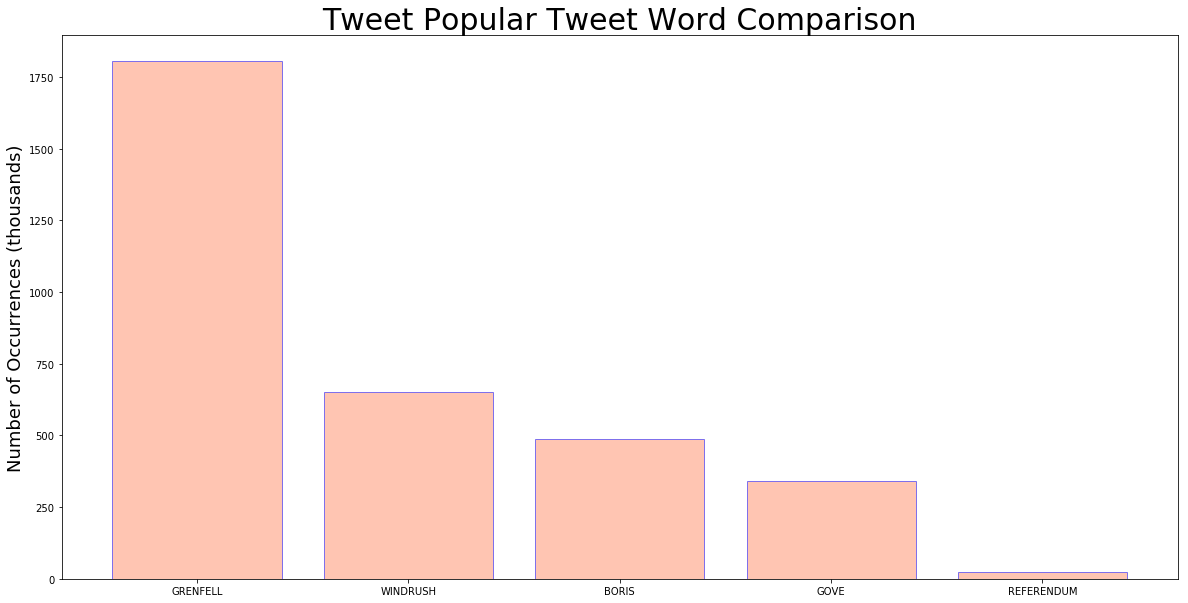

In [30]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal')
plt.title("Tweet Popular Tweet Word Comparison", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")
plt.savefig("COMPARE")
plt.show()

## USER DESCRIPTION NUMERICAL ANALYSIS

Change the below values to see how they rank in tweet frequency **YOU DON'T NEED TO WORRY ABOUT CASE SENSITIVITY IN WORDING**, that is covered in the code.

```
WORDONE=''
WORDTWO=''
WORDTHREE=''
```

In [31]:

WORDONE='tory'
WORDTWO='labour'
WORDTHREE='libdem'
WORDFOUR = 'ukip'
WORDFIVE = 'Green party'
WORDSIX = 'greens'
WORDSEVEN = 'referendum'
WORDEIGHT = 'leave'
WORDNINE = 'remain'
WORDTEN = 'brexit'




WORDONE= WORDONE.upper()
WORDTWO= WORDTWO.upper()
WORDTHREE=WORDTHREE.upper()
WORDFOUR = WORDFOUR.upper()
WORDFIVE = WORDFIVE.upper()
WORDSIX = WORDSIX.upper()
WORDSEVEN = WORDSEVEN.upper()
WORDEIGHT = WORDEIGHT.upper()
WORDNINE = WORDNINE.upper()
WORDTEN = WORDTEN.upper()






WORDONE_COUNT = 0
WORDTWO_COUNT = 0 
WORDTHREE_COUNT = 0 
WORDFOUR_COUNT = 0
WORDFIVE_COUNT = 0
WORDSIX_COUNT = 0
WORDSEVEN_COUNT= 0
WORDEIGHT_COUNT= 0
WORDNINE_COUNT = 0
WORDTEN_COUNT = 0


linecount = 0
APPENDED_DESCRIPTION = ""



for x in range(0, len(status_array)):
    linecount = linecount + 1
    description = str(status_array[x]['user']['description']).upper()
    APPENDED_DESCRIPTION = APPENDED_DESCRIPTION + str(description)
    
    
    if str(description).count(str(WORDONE)) >= 1:
        WORDONE_COUNT = WORDONE_COUNT + 1
    if str(description).count(str(WORDTWO)) >= 1:
        WORDTWO_COUNT = WORDTWO_COUNT + 1
    if str(description).count(str(WORDTHREE)) >= 1:
        WORDTHREE_COUNT = WORDTHREE_COUNT + 1
    if str(description).count(str(WORDFOUR)) >= 1:
        WORDFOUR_COUNT = WORDFOUR_COUNT + 1
    if str(description).count(str(WORDFIVE)) >= 1:
        WORDFIVE_COUNT = WORDFIVE_COUNT + 1
    if str(description).count(str(WORDSIX)) >= 1:
        WORDSIX_COUNT = WORDSIX_COUNT + 1
    if str(description).count(str(WORDSEVEN)) >= 1:
        WORDSEVEN_COUNT = WORDSEVEN_COUNT + 1
    if str(description).count(str(WORDEIGHT)) >= 1:
        WORDEIGHT_COUNT = WORDEIGHT_COUNT + 1
    if str(description).count(str(WORDNINE)) >= 1:
        WORDNINE_COUNT = WORDNINE_COUNT + 1
    if str(description).count(str(WORDTEN)) >= 1:
        WORDTEN_COUNT = WORDTEN_COUNT + 1

      
      
        
print('Total count of words - ' + str(WORDONE) + ' :' + str(WORDONE_COUNT))
print('Total count of words - ' + str(WORDTWO) + ' :' + str(WORDTWO_COUNT))
print('Total count of words - ' + str(WORDTHREE) + ' :' + str(WORDTHREE_COUNT))
print('Total count of words - ' + str(WORDFOUR) + ' :' + str(WORDFOUR_COUNT))
print('Total count of words - ' + str(WORDFIVE) + ' :' + str(WORDFIVE_COUNT))
print('Total count of words - ' + str(WORDSIX) + ' :' + str(WORDSIX_COUNT))
print('Total count of words - ' + str(WORDSEVEN) + ' :' + str(WORDSEVEN_COUNT))
print('Total count of words - ' + str(WORDEIGHT) + ' :' + str(WORDEIGHT_COUNT))
print('Total count of words - ' + str(WORDNINE) + ' :' + str(WORDNINE_COUNT))
print('Total count of words - ' + str(WORDTEN) + ' :' + str(WORDTEN_COUNT))
print('Total Number of Records: ' + str(linecount)) 


APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('#', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace('.', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')
APPENDED_DESCRIPTION = APPENDED_DESCRIPTION.replace(',', '')

Total count of words - TORY :196
Total count of words - LABOUR :178
Total count of words - LIBDEM :10
Total count of words - UKIP :16
Total count of words - GREEN PARTY :1
Total count of words - GREENS :2
Total count of words - REFERENDUM :4
Total count of words - LEAVE :39
Total count of words - REMAIN :69
Total count of words - BREXIT :288
Total Number of Records: 10000


## BESPOKE VISUALIZATION

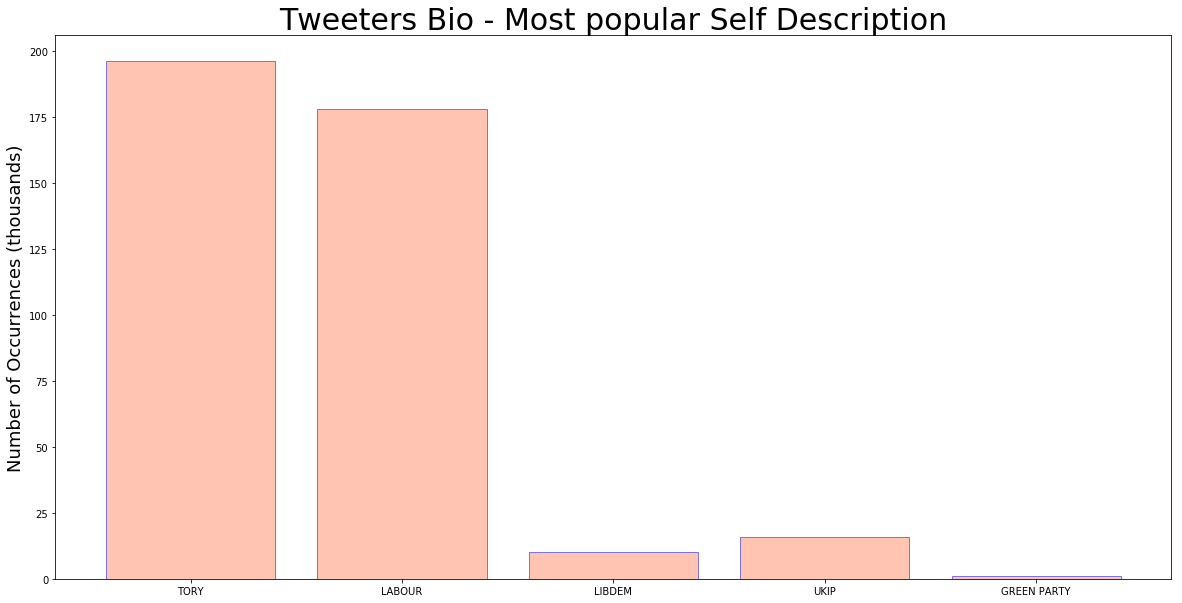

In [32]:
import matplotlib.pyplot as plt
B = {str(WORDONE):int(WORDONE_COUNT), 
     str(WORDTWO):int(WORDTWO_COUNT),
    str(WORDTHREE):int(WORDTHREE_COUNT),
    str(WORDFOUR):int(WORDFOUR_COUNT),
    str(WORDFIVE):int(WORDFIVE_COUNT)}



plt.bar(range(len(B)), list(B.values()), align='center', alpha=0.5, color=('#ff8c66'),  edgecolor='blue')

plt.xticks(range(len(B)), list(B.keys()), rotation='horizontal')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
#plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
#plt.savefig("BESPOKE", bbox_inches="tight")
plt.savefig("COMPARE")
plt.show()

In [35]:
from collections import Counter, OrderedDict
DISC = APPENDED_DESCRIPTION.split()
x = Counter(DISC)
del x['⠀'],x['AND'],x['THE'],x['OF'],x['TO'],x['A'],x['IN'],x['&'],x['MY'],x['FOR'],x['I'],x['NOT'],x['IS'],x['ARE']
del x['WITH'],x['ALL'],x['ON'],x['-'],x['YOU'],x['BY'],x['IT'],x['NO'],x['OR'],x['OWN'],x['THAT'],x['AT'],x['BE'],x['|'],x['WILL'],
del x['BUT'],x['AN'],x['ABOUT'],x['AS'],x['FROM'],x['WHO'],x['ME'],x['WE'],x['HAVE'],x['OUR'],x['AM'],x['LIKE'],x['JUST']
del x['THIS'],x['THEY'],x['IF'],x['HAS'],x['&AMP'],x['HAS'],x['CAN'],x['NOW'],x['SO'],x['ONLY'],x['WAS'],x['WHAT'],x['THEIR'],x['YOUR'],x['WOULD']
del x['DO'],x['&AMP;'],x['ONE'],x['WANT'],x['BEEN'],x['THEM'],x['MORE'],x['/'],x['•'],x["I'M"],x[''],x['']

top_bio_desc = OrderedDict(x.most_common(20))
print(top_bio_desc)


OrderedDict([('LOVE', 344), ('VIEWS', 256), ('FAN', 248), ('POLITICS', 210), ('NEWS', 198), ('LIFE', 195), ('MUSIC', 193), ('PROUD', 172), ('LOVER', 166), ('MAGA', 166), ('WRITER', 162), ('UP', 159), ('BREXIT', 148), ('TIME', 143), ('WORLD', 137), ('MEMBER', 137), ('PEOPLE', 128), ('HERE', 126), ('THINGS', 126), ('TWEETS', 123)])


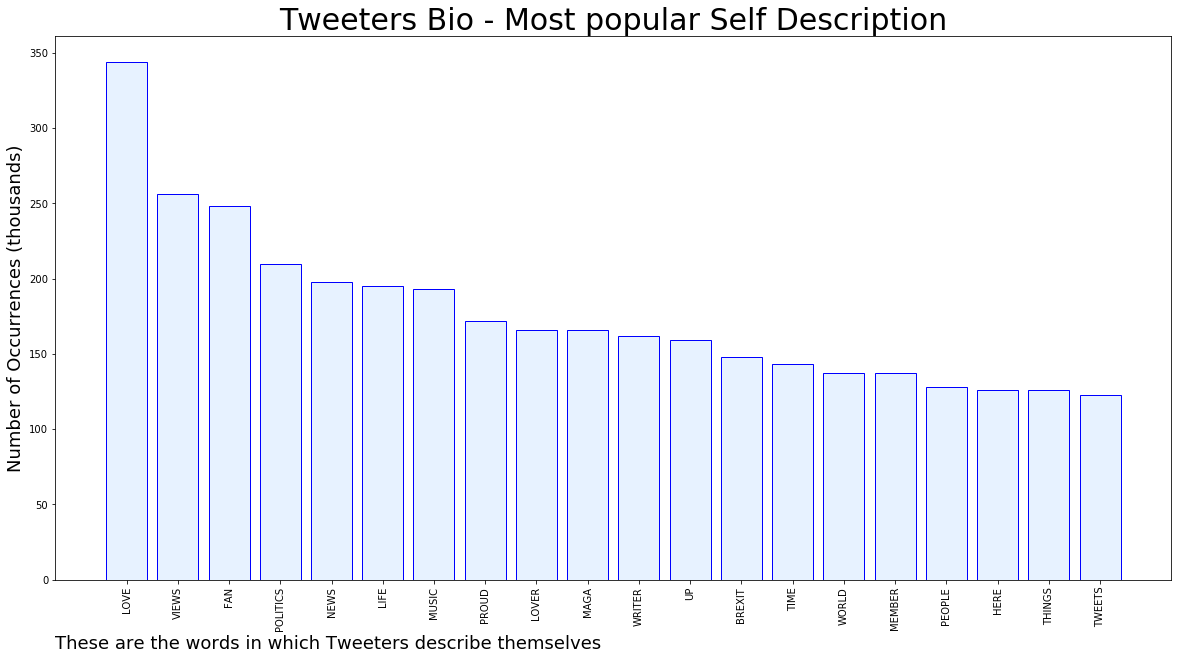

In [37]:
import matplotlib.pyplot as plt

D = top_bio_desc

plt.bar(range(len(D)), list(D.values()), align='center', color=(0.1, 0.5, 1, 0.1),  edgecolor='blue')

plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')
plt.title("Tweeters Bio - Most popular Self Description", fontsize=30)
plt.ylabel('Number of Occurrences (thousands)', fontsize=18)
plt.xlabel('These are the words in which Tweeters describe themselves', horizontalalignment='left', position=(0,25), fontsize=18)
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig("BIO", bbox_inches="tight")
plt.show()

# SENTIMENT ANALYSIS 

The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

# Now the Theory
Thanks to Siraj Raval and freecode camp for the sample here

TextBlob
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

A textblob can be created in the following way (example, and not part of the original code):

example = TextBlob("Python is a high-level, general-purpose programming language.")
And tokenization can be performed by the following methods:
words: returns the words of text

usage:

example.words
sentences: returns the sentences of text

usage:

example.sentences


In [40]:
from textblob import TextBlob
import tweepy


In [41]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth)

In [42]:
public_tweets = api.search('Theresa May')

In [43]:
objective_tweet=0
subjective_tweet=0
negitively_subjective=0
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       subjective_tweet = subjective_tweet + 1
       print('Subjective')
    elif analysis.sentiment[0]<0:
       negitively_subjective = negitively_subjective  + 1
       print('Negatively subjective')
    else:
       objective_tweet = objective_tweet + 1
       print('objective')
    print('\n')
    
print('objective_tweets : '+str(objective_tweet))
print('subjective_tweets : '+str(subjective_tweet))
print('negitively_subjective tweets: '+str(negitively_subjective))

RT @BBCPolitics: "I feel desperately sorry for Theresa" says former prime minister David Cameron, "she's a dedicated public servant"

React…
Sentiment(polarity=-0.16666666666666666, subjectivity=0.35555555555555557)
Negatively subjective


RT @lucianoghelfi: Theresa #May annuncia #dimissioni il 7 giugno: si rammarica di non aver attuato la #Brexit. Il fallimento non è solo suo…
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @ladyhaja: statement from the Fire Brigades Union on Theresa May and Grenfell. No further comment necessary. https://t.co/3a4yEAaqMJ
Sentiment(polarity=0.0, subjectivity=0.75)
objective


RT @DamnCoffee: I edited Julia's Theme from #EastEnders over Theresa May's resignation speech... https://t.co/lQ9QxqOXVu
Sentiment(polarity=0.0, subjectivity=0.0)
objective


RT @assi7realismus: UK set for new PM as Theresa May quits https://t.co/KnkNTh4aXp
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Subjective


RT @simon_price01: The most s

# SAMPLE

In [44]:
status_array[3]['text']

'U.K. Prime Minister Theresa May announced her resignation earlier today. \n\n@swajcmanearle wrote about how Boris Joh… https://t.co/j8PXKFeIbO'

In [45]:
retweet_array= []
for current in range(0, len(status_array)):
    retweet_array.append(status_array[current]['retweet_count'])
    
print('length of retweeted array: ' + str(len(retweet_array)))
most_retweeted = max(retweet_array)
print("most number of retweets: " + str(most_retweeted) + " at index " + str(retweet_array.index(max(retweet_array))))
print('The person who tweeted it was ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['screen_name']))
print('Their screename is" ' + str(status_array[retweet_array.index(max(retweet_array))]['user']['name']))
print('There tweet was : ')
print(status_array[retweet_array.index(max(retweet_array))]['text'])

length of retweeted array: 10000
most number of retweets: 0 at index 0
The person who tweeted it was jack_molnar15
Their screename is" Jack Molnar
There tweet was : 
RT @davidschneider: Theresa May guide to crying

NO TEARS for
Grenfell
The Windrush generation
Deaths and misery caused by the hostile envi…


In [46]:
status_array[retweet_array.index(max(retweet_array))]['text']

'RT @davidschneider: Theresa May guide to crying\n\nNO TEARS for\nGrenfell\nThe Windrush generation\nDeaths and misery caused by the hostile envi…'

# GOOGLE TRENDS 

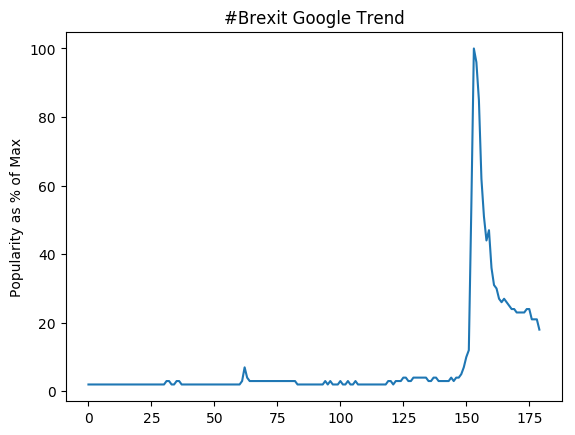

In [47]:
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

with open('may.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
google =data[3:]

dates = []
values = []
for x in range(0, len(google)):
    dates.append(str(google[x][0]))
    values.append(google[x][1])
    



y_pos = np.arange(len(dates))
#performance = values
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, dates, rotation="vertical")






plt.plot(y_pos, values)

plt.title('#Brexit Google Trend')
plt.ylabel('Popularity as % of Max')
#plt.xticks(y_pos, dates, rotation="vertical")
#plt.xticks(np.arange(min(y_pos), max(y_pos)+1, 1.0))
plt.savefig("trend", bbox_inches="tight")
plt.show()

In [ ]:
y_pos